In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from cdlib import algorithms
import dynetx as dn
import calendar
from cdlib import algorithms, evaluation
from cdlib import NodeClustering
from scipy import signal

Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap', 'graph_tool', 'karateclub'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'ASLPAw', 'karateclub'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}


In [2]:
#to change font size
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
g = dn.DynGraph(edge_removal = True)

In [4]:
leg = 'xviii'
tt = 1

mod = []
avg_cc = []
n_comm = []
n_comps = []

year = '2018'
print(year)

for m in range (6,13):
    #print(m)
    month = str(m)
    f = nx.read_edgelist(f'../{leg}-months/edgelist-{leg}-{year}_{month}.txt')
    g.add_interactions_from(f.edges(), t=tt)
    comm = nx.community.louvain_communities(f)
    n_comm.append(len(comm))
    mod.append(nx.community.modularity(f,comm))
    avg_cc.append(nx.average_clustering(f)) # compute the global clustering coefficient
    n_comps.append(nx.number_connected_components(f))
    tt = tt + 1

year = '2019'
print(year)

for m in range (1,13):
    #print(m)
    month = str(m)
    f = nx.read_edgelist(f'../{leg}-months/edgelist-{leg}-{year}_{month}.txt')
    g.add_interactions_from(f.edges(), t=tt)
    comm = nx.community.louvain_communities(f)
    n_comm.append(len(comm))

    mod.append(nx.community.modularity(f,comm))
    avg_cc.append(nx.average_clustering(f)) # compute the global clustering coefficient
    n_comps.append(nx.number_connected_components(f))
    tt = tt + 1

year = '2020'
print(year)

for m in range (1,13):
    #print(m)
    month = str(m)
    f = nx.read_edgelist(f'../{leg}-months/edgelist-{leg}-{year}_{month}.txt')
    g.add_interactions_from(f.edges(), t=tt)
    comm = nx.community.louvain_communities(f)
    n_comm.append(len(comm))

    mod.append(nx.community.modularity(f,comm))
    avg_cc.append(nx.average_clustering(f)) # compute the global clustering coefficient
    n_comps.append(nx.number_connected_components(f))
    tt = tt + 1

year = '2021'
print(year)

for m in range (1,13):
    #print(m)
    month = str(m)
    f = nx.read_edgelist(f'../{leg}-months/edgelist-{leg}-{year}_{month}.txt')
    g.add_interactions_from(f.edges(), t=tt)
    comm = nx.community.louvain_communities(f)
    n_comm.append(len(comm))
    mod.append(nx.community.modularity(f,comm))
    avg_cc.append(nx.average_clustering(f)) # compute the global clustering coefficient
    n_comps.append(nx.number_connected_components(f))
    tt = tt + 1

year = '2022'
print(year)
for m in range (2,9):
    #print(m)
    month = str(m)
    f = nx.read_edgelist(f'../{leg}-months/edgelist-{leg}-{year}_{month}.txt')
    g.add_interactions_from(f.edges(), t=tt)
    comm = nx.community.louvain_communities(f)
    n_comm.append(len(comm))
    mod.append(nx.community.modularity(f,comm))
    avg_cc.append(nx.average_clustering(f)) # compute the global clustering coefficient
    n_comps.append(nx.number_connected_components(f))
    tt = tt + 1


print(f'number of considered months: {tt-1}')

2018


2019
2020
2021
2022
number of considered months: 50


In [15]:
print(g.number_of_nodes())
print(g.number_of_interactions())

615
188783


In [6]:
np.save(f'n_comm_{leg}',n_comm)
np.save(f'mod_{leg}', mod)
np.save(f'avg_cc_{leg}', avg_cc)
np.save(f'n_comps_{leg}',n_comps)

In [7]:
m = list(calendar.month_abbr)
m.pop(0)
m_18 = list(calendar.month_abbr)
del m_18[0:6]
m_22 = list(calendar.month_abbr)
del m_22[9:]
del m_22[0:2]

mm = m_18+m+m+m+m_22

for i in range(len(mm)):
    if i < 7:
        mm[i] = mm[i]+' 18'
    if i >= 7 and i <19:
        mm[i] = mm[i]+' 19'
    if i >= 19 and i <31:
        mm[i] = mm[i]+' 20'
    if i >= 31 and i <43:
        mm[i] = mm[i]+' 21'
    if i >= 43:
        mm[i] = mm[i]+' 22'
'''    
mm[0] = mm[0]+' 2019'
mm[12] = mm[12]+' 2020'
mm[24] = mm[24]+' 2021'
'''

print(mm)

['Jun 18', 'Jul 18', 'Aug 18', 'Sep 18', 'Oct 18', 'Nov 18', 'Dec 18', 'Jan 19', 'Feb 19', 'Mar 19', 'Apr 19', 'May 19', 'Jun 19', 'Jul 19', 'Aug 19', 'Sep 19', 'Oct 19', 'Nov 19', 'Dec 19', 'Jan 20', 'Feb 20', 'Mar 20', 'Apr 20', 'May 20', 'Jun 20', 'Jul 20', 'Aug 20', 'Sep 20', 'Oct 20', 'Nov 20', 'Dec 20', 'Jan 21', 'Feb 21', 'Mar 21', 'Apr 21', 'May 21', 'Jun 21', 'Jul 21', 'Aug 21', 'Sep 21', 'Oct 21', 'Nov 21', 'Dec 21', 'Feb 22', 'Mar 22', 'Apr 22', 'May 22', 'Jun 22', 'Jul 22', 'Aug 22']


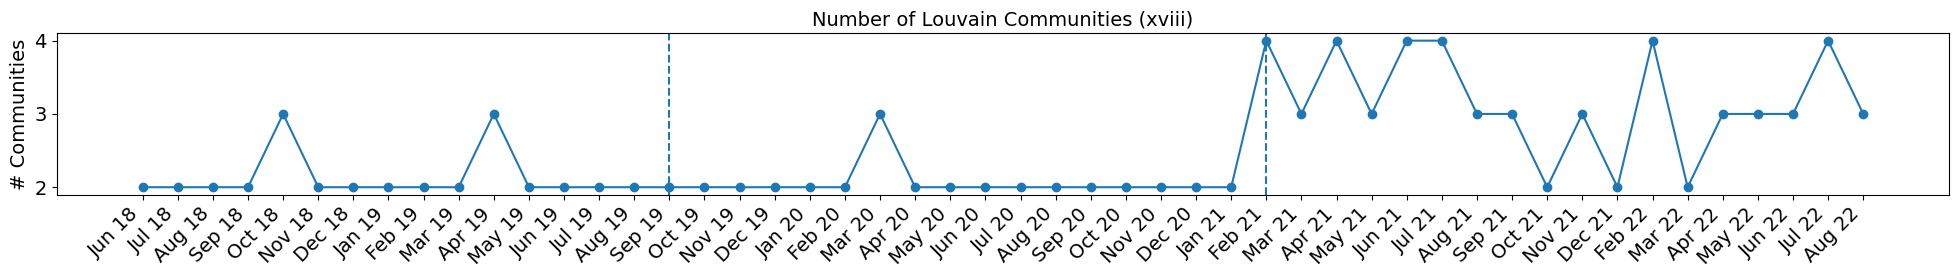

In [8]:
fig = plt.figure(figsize = (20, 3))
plt.title(f'Number of Louvain Communities ({leg})')
plt.ylabel('# Communities')
plt.plot(mm, n_comm, '-o')
plt.xticks(rotation=45, ha='right')
plt.axvline(x='Sep 19', linestyle = '--')
plt.axvline(x='Feb 21', linestyle = '--')
smooth = signal.savgol_filter(mod, 5, 2)
#plt.plot(mm,smooth, color='green')
plt.tight_layout()

plt.savefig("dynamic_n_comm_xviii.png")

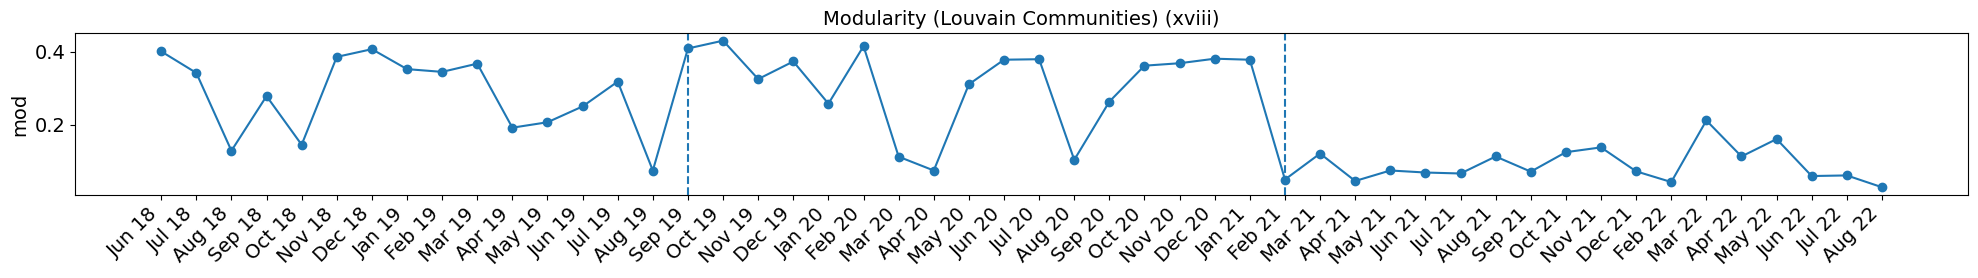

In [9]:
fig = plt.figure(figsize = (20, 3))
plt.title(f'Modularity (Louvain Communities) ({leg})')
plt.ylabel('mod')
plt.plot(mm, mod, '-o')
plt.xticks(rotation=45, ha='right')
plt.axvline(x='Sep 19', linestyle = '--')
plt.axvline(x='Feb 21', linestyle = '--')
plt.tight_layout()

plt.savefig("dynamic_mod_xviii.png")


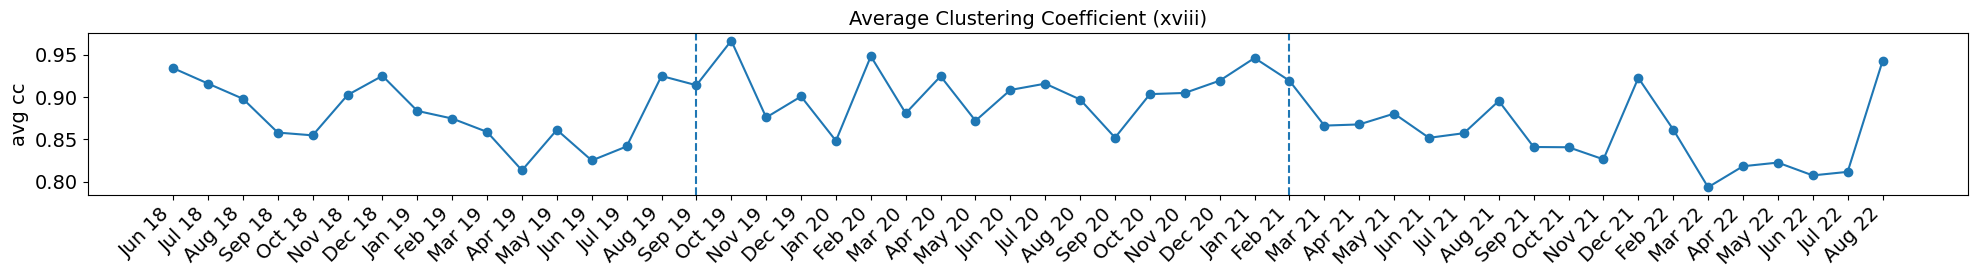

In [10]:
fig = plt.figure(figsize = (20, 3))
plt.title(f'Average Clustering Coefficient ({leg})')
plt.ylabel('avg cc')
plt.plot(mm, avg_cc, '-o')
plt.xticks(rotation=45, ha='right')
plt.axvline(x='Sep 19', linestyle = '--')
plt.axvline(x='Feb 21', linestyle = '--')
plt.tight_layout()

plt.savefig("dynamic_cc_xviii.png")


In [11]:
nodes = []
interactions = [] 
avg_deg = []

for i in range (1,tt):
    print(i)
    nodes.append(g.number_of_nodes(t=i))
    interactions.append(g.number_of_interactions(t=i))
    deg = sum(dict(g.degree(t=i)).values())/float(g.number_of_nodes(t=i)) #avg degree
    avg_deg.append(deg)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [12]:
np.save(f'nodes_{leg}',nodes)
np.save(f'interactions_{leg}', interactions)
np.save(f'avg_deg_{leg}', avg_deg) 

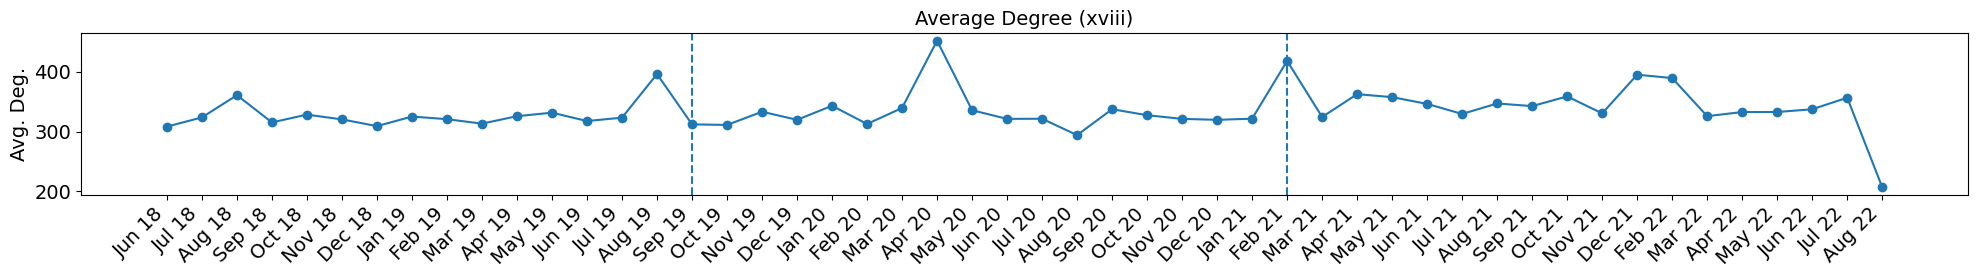

In [13]:
fig = plt.figure(figsize = (20, 3))
plt.title(f'Average Degree ({leg})')
plt.ylabel('Avg. Deg.')
plt.plot(mm, avg_deg, '-o')
plt.xticks(rotation=45, ha='right')
plt.axvline(x='Sep 19', linestyle = '--')
plt.axvline(x='Feb 21', linestyle = '--')
plt.tight_layout()
plt.savefig("dynamic_avg_deg_xviii.png")


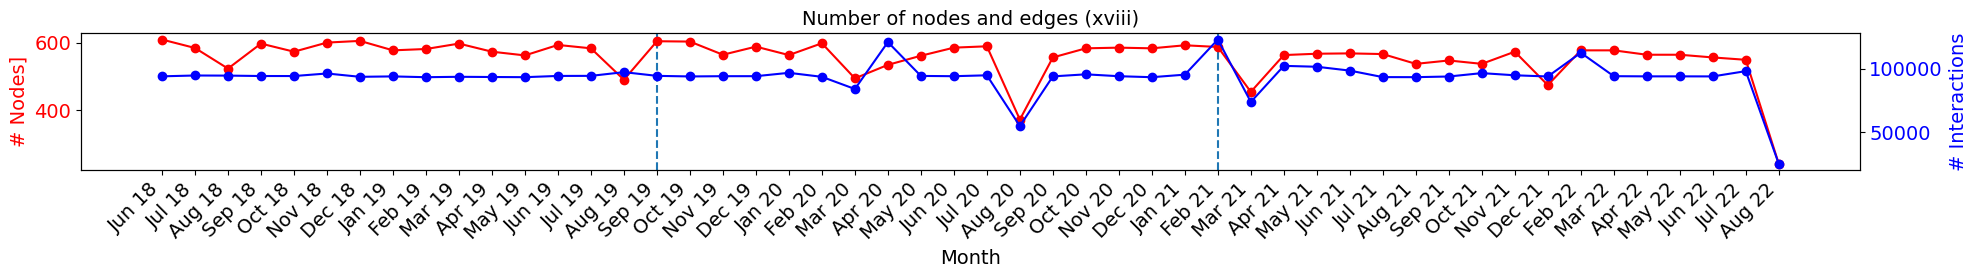

In [14]:
fig = plt.figure(figsize = (20, 3))

ax0 = fig.add_subplot(111) 
plt.axvline(x='Sep 19', linestyle = '--')
plt.axvline(x='Feb 21', linestyle = '--')
ax0.title.set_text(f'Number of nodes and edges ({leg})')

ax0.plot(mm, nodes,'-o', color = 'r')
ax0.set_xlabel('Month')
ax0.set_ylabel('# Nodes]', color = 'r')
ax0.tick_params(axis = "y", labelcolor='r')
plt.xticks(rotation=45, ha='right')

ax1=ax0.twinx()
ax1.plot(mm, interactions, '-o', color = 'b')
ax1.set_ylabel('# Interactions', color = 'b')
ax1.tick_params(axis = "y", labelcolor = 'b')
plt.tight_layout()

plt.savefig("dynamic_nodes_edges_xviii.png")
